In [1]:
import ROOT
import ostap.fixes.fixes
from ostap.core.core import cpp, Ostap
from ostap.core.core import pwd, cwd, ROOTCWD
from ostap.core.core import rootID, funcID, funID, fID, histoID, hID, dsID
from ostap.core.core import VE
from ostap.histos.histos import h1_axis, h2_axes, h3_axes
from ostap.histos.graphs import makeGraph, hToGraph, hToGraph2, hToGraph3, lw_graph
import ostap.trees.trees
import ostap.trees.cuts
import ostap.histos.param
import ostap.histos.compare
import ostap.io.root_file
import ostap.math.models
import ostap.fitting.roofit 
import ostap.fitting.models as Models

Welcome to JupyROOT 6.20/06


In [32]:
canv = ROOT.TCanvas("canv","canv",900,450)
rfile = ROOT.TFile("Sc.root","READ")
rfile.ls()

TFile**		Sc.root	
 TFile*		Sc.root	
  KEY: TH1F	h_0_scpp;1	#Lambda_{c}^{+} mass bin 0
  KEY: TH1F	h_1_scpp;1	#Lambda_{c}^{+} mass bin 1
  KEY: TH1F	h_2_scpp;1	#Lambda_{c}^{+} mass bin 2
  KEY: TH1F	h_3_scpp;1	#Lambda_{c}^{+} mass bin 3
  KEY: TH1F	h_4_scpp;1	#Lambda_{c}^{+} mass bin 4
  KEY: TH1F	h_5_scpp;1	#Lambda_{c}^{+} mass bin 5
  KEY: TH1F	h_0_sc0;1	#Lambda_{c}^{+} mass bin 0
  KEY: TH1F	h_1_sc0;1	#Lambda_{c}^{+} mass bin 1
  KEY: TH1F	h_2_sc0;1	#Lambda_{c}^{+} mass bin 2
  KEY: TH1F	h_3_sc0;1	#Lambda_{c}^{+} mass bin 3
  KEY: TH1F	h_4_sc0;1	#Lambda_{c}^{+} mass bin 4
  KEY: TH1F	h_5_sc0;1	#Lambda_{c}^{+} mass bin 5


Warning in <TCanvas::Constructor>: Deleting canvas with same name: canv


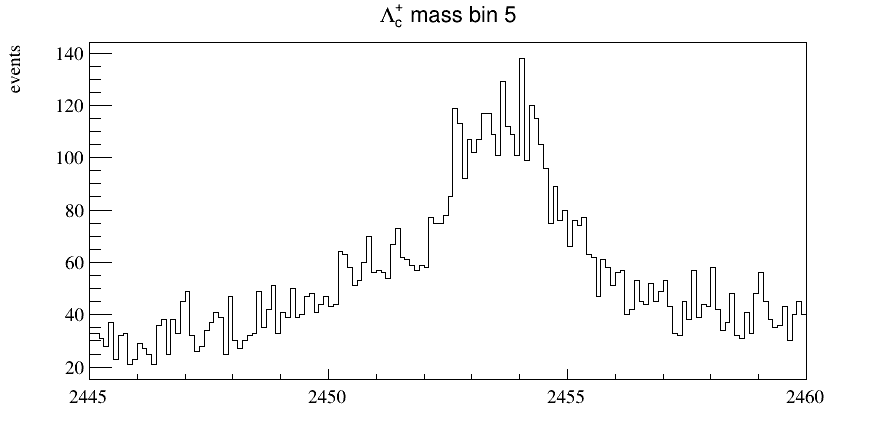

In [42]:
hh_scpp = []
hh_sc0  = []
for i in range(6):
    hh_scpp.append(rfile["h_"+str(i)+"_scpp"])
    hh_sc0 .append(rfile["h_"+str(i)+"_sc0"] )
hh_sc0[5].Draw("hist")
canv.Draw()

 FCN=50.1367 FROM MIGRAD    STATUS=CONVERGED     166 CALLS         167 TOTAL
                     EDM=2.08653e-08    STRATEGY= 1  ERROR MATRIX UNCERTAINTY   2.7 per cent
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           2.45391e+03   3.13840e-02   7.90244e-05   3.01456e-03
   2  p1           1.26803e+02   2.54515e+00  -7.72895e-03  -1.52634e-04
   3  p2          -1.94394e+01   1.23275e+00  -1.53540e-05  -2.07154e-04
 FCN=105.194 FROM MIGRAD    STATUS=CONVERGED      82 CALLS          83 TOTAL
                     EDM=1.82607e-10    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           2.45385e+03   2.45453e-02   1.17009e-03   2.75674e-04
   2  p1           3.09618e+02   4.02370e+00   1.23424e-02  -6.51096e-06
   3  p2          -4

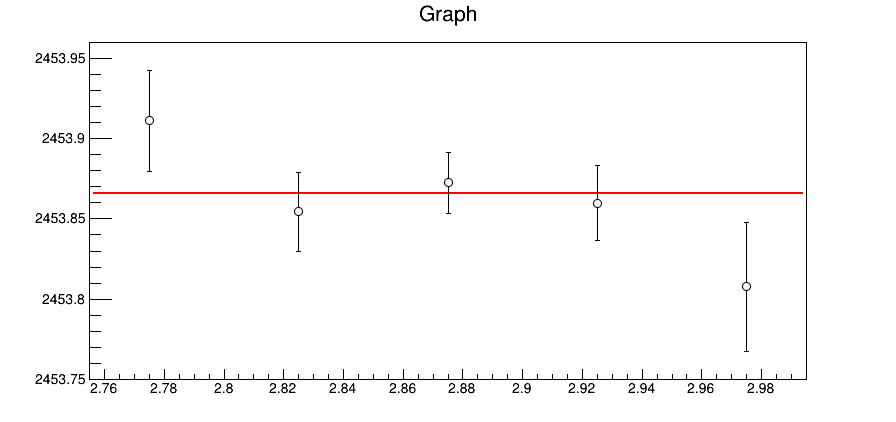

In [62]:
my_pol2 = ROOT.TF1("my_pol2","[1]+[2]*pow(x-[0],2)",2452,2456)
my_pol2.SetParameter(0,2454)
ve = []
xx = []
for i in range(1,6):
    xx.append( VE( 2.725 + i*0.05,0) )
    hh_scpp[i].GetXaxis().SetRangeUser(2452, 2456)
    hh_scpp[i].Draw("e1")
    hh_scpp[i].Fit(my_pol2)
    ve.append( VE( my_pol2.GetParameter(0),my_pol2.GetParError(0)**2 ) )
gr = makeGraph(xx,ve)
gr.SetMarkerStyle(24)
gr.Draw("AP")
gr.Fit("pol0")
canv.Draw()

 FCN=64.0795 FROM MIGRAD    STATUS=CALL LIMIT   1345 CALLS        1346 TOTAL
                     EDM=0.00422235    STRATEGY= 1  ERROR MATRIX UNCERTAINTY  62.6 per cent
  EXT PARAMETER                APPROXIMATE        STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           2.52911e+03   2.70176e+01   1.38122e+00  -3.61020e-01
   2  p1          -1.33720e+02   8.19437e+01  -3.91900e+00  -8.36954e-02
   3  p2           2.88641e-02   8.44282e-03  -3.72681e-04  -4.56596e+02


Warning in <Fit>: Abnormal termination of minimization.


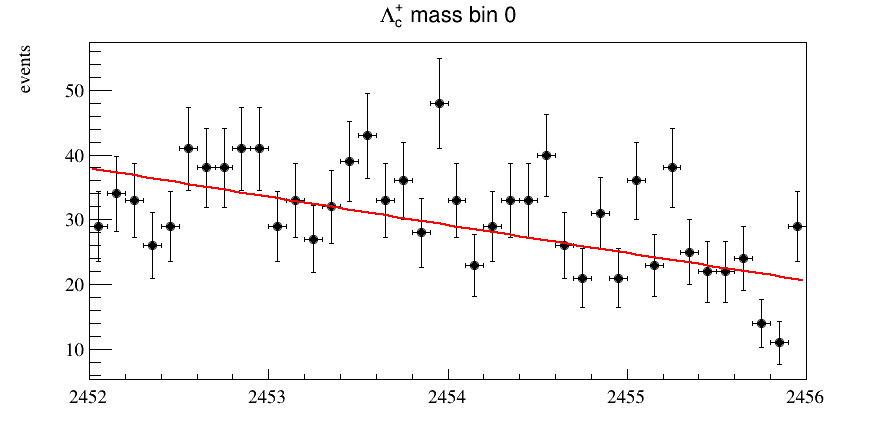

In [63]:
my_pol20 = ROOT.TF1("my_pol20","[1]+[2]*pow(x-[0],2)",2452,2456)
my_pol20.SetParameter(0,2454)
hh_sc0[0].GetXaxis().SetRangeUser(2452, 2456)
hh_sc0[0].Draw("e1")
hh_sc0[0].Fit(my_pol20)
canv.Draw()

 FCN=59.9506 FROM MIGRAD    STATUS=CONVERGED     209 CALLS         210 TOTAL
                     EDM=3.82931e-10    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           2.45364e+03   5.76858e-02   1.16999e-03   4.32383e-04
   2  p1           1.20225e+02   2.41587e+00   5.87496e-03   1.23425e-05
   3  p2          -1.38110e+01   1.24415e+00   2.42704e-03   1.64013e-05
 FCN=80.4725 FROM MIGRAD    STATUS=CONVERGED      96 CALLS          97 TOTAL
                     EDM=2.59653e-10    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           2.45362e+03   3.75328e-02   1.16998e-03  -2.96490e-04
   2  p1           3.14312e+02   3.90588e+00   1.09967e-02  -8.79150e-06
   3  p2          -3.53330e+01   

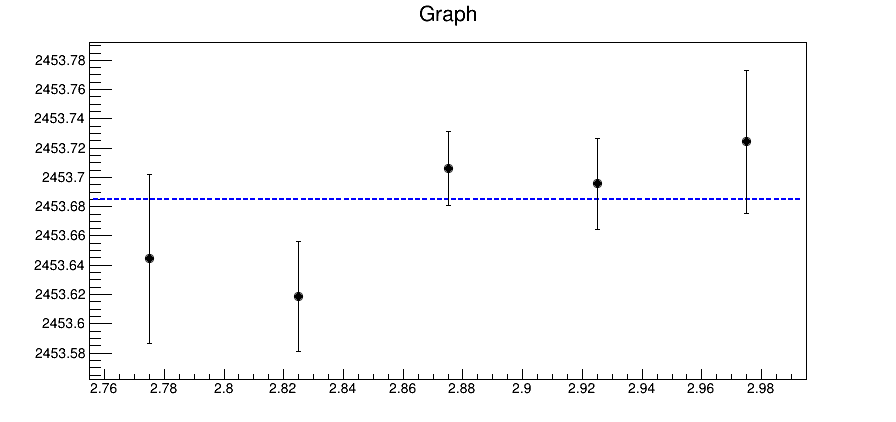

In [64]:
my_pol20 = ROOT.TF1("my_pol20","[1]+[2]*pow(x-[0],2)",2452,2456)
my_pol20.SetParameter(0,2454)
ve0 = []
xx0 = []
for i in range(1,6):
    xx0.append( VE( 2.725 + i*0.05,0) )
    hh_sc0[i].GetXaxis().SetRangeUser(2452, 2456)
    hh_sc0[i].Draw("e1")
    hh_sc0[i].Fit(my_pol20)
    ve0.append( VE( my_pol20.GetParameter(0),my_pol20.GetParError(0)**2 ) )
gr0 = makeGraph(xx0,ve0)
gr0.SetMarkerStyle(20)
gr0.Draw("AP")
my_sc0 = ROOT.TF1("my_sc0","[0]",2452,2456)
my_sc0.SetLineColor(4)
my_sc0.SetLineStyle(7)
gr0.Fit(my_sc0)
canv.Draw()

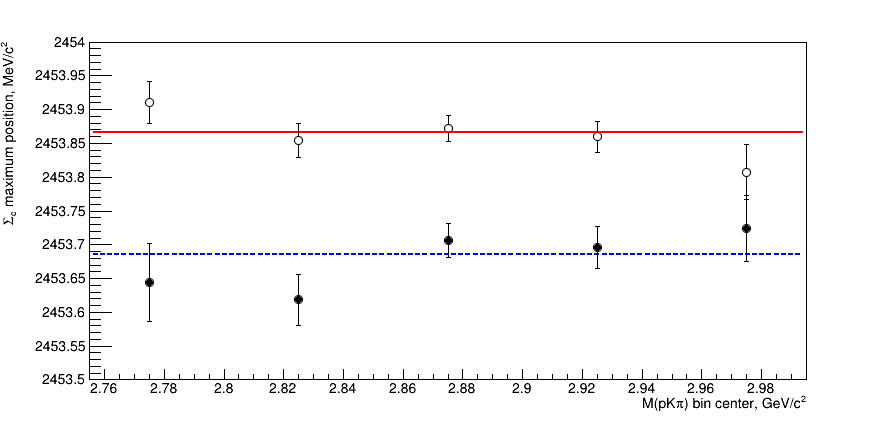

In [66]:
gr.SetTitle("")
gr0.SetTitle("")
gr.Draw("AP")
gr.GetYaxis().SetRangeUser(2453.5,2454)
gr.GetYaxis().SetTitle("#Sigma_{c} maximum position, MeV/c^{2}")
gr.GetXaxis().SetTitle("M(pK#pi) bin center, GeV/c^{2}")
gr0.Draw("P same")
canv.Draw()

In [67]:
canv.Print("ScMaximumVSLcMass.pdf")

Info in <TCanvas::Print>: pdf file ScMaximumVSLcMass.pdf has been created
